In [1]:
# upload the files into the colab notebook
from google.colab import files
uploaded = files.upload()

Saving DataSet2.csv to DataSet2.csv


In [2]:
# general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, fbeta_score
from time import time

In [3]:
# load the dataset into a pandas dataframe
df = pd.read_csv('DataSet2.csv')

In [4]:
#examine the data sampel
df.describe()

,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.411765,-0.066277,0.025411,-0.004941,-0.018150,0.004139,-0.004442,0.039203,-0.024454,-0.008586,0.005379
std,0.492298,0.421414,0.284509,1.001383,0.983988,1.031957,1.033610,0.978798,0.987621,0.993979,1.017824
min,0.000000,-0.925228,-0.931249,-3.547109,-4.166713,-3.271321,-3.050503,-3.188723,-3.691485,-3.426298,-4.075024
25%,0.000000,-0.383928,-0.189961,-0.693761,-0.630827,-0.717443,-0.679205,-0.606272,-0.691628,-0.643558,-0.679580
50%,0.000000,0.018826,0.011861,0.002496,0.008173,0.015596,-0.021232,0.049557,-0.040668,0.012354,0.009655
75%,1.000000,0.156138,0.270204,0.697783,0.638092,0.748816,0.713769,0.673363,0.629988,0.654637,0.692432
max,1.000000,0.696405,0.567431,2.977407,3.434698,3.575212,3.387439,4.651006,3.763927,3.259833,3.095674


## POA
#### Data Preprocessing
    - check for null values
    - draw the data correlation graph and analyse correlation coefficeints
    - One hot encode (x1), normalization(Min Max Scaling)
    - Feature selection (correlation graph)

#### Model Selection:
    - KNN
    - Decision Tree
    - Random Forest
    - Logistic Regression
    - SVM

#### Model Training:
    - Train-test-split
    - Evaluate Training Curves (Cross-validation)
    - Hyperparameter tuning: grid search

#### Model Visualization
    - Correlation plots
    - Scatter plots
    - Learning curve for algorithm performance
    - Confusion matrix

In [5]:
# checking for presence of null values
df[df.isnull().any(axis=1)]


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11


In [6]:
df[df.isna().any(axis=1)]

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11


### Preprocessing

In [7]:
# one hot encoding
oneHotEncodedDf = pd.get_dummies(df)
oneHotEncodedDf.head()

,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x1_a,x1_b,x1_c,x1_d
0,0,-0.375866,0.427942,-0.922338,0.210758,0.109015,0.621001,-0.444421,0.089970,-0.707711,0.473700,1,0,0,0
1,0,0.047819,0.115627,-1.781739,-0.272785,0.392783,1.094168,-0.975254,-0.353424,0.145543,-0.064961,0,1,0,0
2,1,0.372868,-0.263291,-1.120545,-0.773828,0.830072,-1.727836,1.323876,-1.587291,-0.024916,0.082491,0,0,0,1
3,0,0.059598,0.270797,0.961795,-1.804197,2.931330,1.891656,0.094252,-0.873467,-1.217680,-1.848046,0,0,1,0
4,1,0.616319,0.291275,-1.113519,0.626864,-0.287989,-0.842649,-0.947257,1.198215,0.972420,-1.054313,0,0,0,1


In [8]:
# mix max normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalizableColumns = list(oneHotEncodedDf.columns)[1:-4]
normalizedDf = oneHotEncodedDf.copy(deep=True)
normalizedDf[normalizableColumns] = scaler.fit_transform(oneHotEncodedDf[normalizableColumns])

In [9]:
normalizedDf.describe()

,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x1_a,x1_b,x1_c,x1_d
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.411765,0.529683,0.638335,0.542901,0.545762,0.478411,0.473142,0.411739,0.491862,0.511164,0.569038,0.253529,0.253529,0.234706,0.258235
std,0.492298,0.259870,0.189840,0.153480,0.129448,0.150727,0.160550,0.124851,0.132470,0.148663,0.141942,0.435159,0.435159,0.423940,0.437793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.333799,0.494627,0.437327,0.465162,0.373018,0.368332,0.329406,0.402373,0.416196,0.473517,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.582163,0.629294,0.544041,0.549225,0.480085,0.470534,0.413060,0.489687,0.514296,0.569635,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.666838,0.801674,0.650606,0.632094,0.587178,0.584701,0.492630,0.579642,0.610358,0.664852,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
labels = normalizedDf['y']
features = normalizedDf.drop(['y'], axis=1)

In [11]:
labels.shape

(1700,)

In [12]:
features.shape

(1700, 14)

In [13]:
# finding correlation of each feature/ column/ independent variable with the dependent variable
normalizedDf.corr().loc['y', :]

y       1.000000
x2      0.634597
x3     -0.384119
x4      0.023029
x5      0.003979
x6     -0.037031
x7     -0.028518
x8     -0.036755
x9      0.006180
x10     0.051892
x11    -0.021991
x1_a    0.017939
x1_b   -0.004040
x1_c   -0.012110
x1_d   -0.002088
Name: y, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bc01cea90>,
      dtype=object)

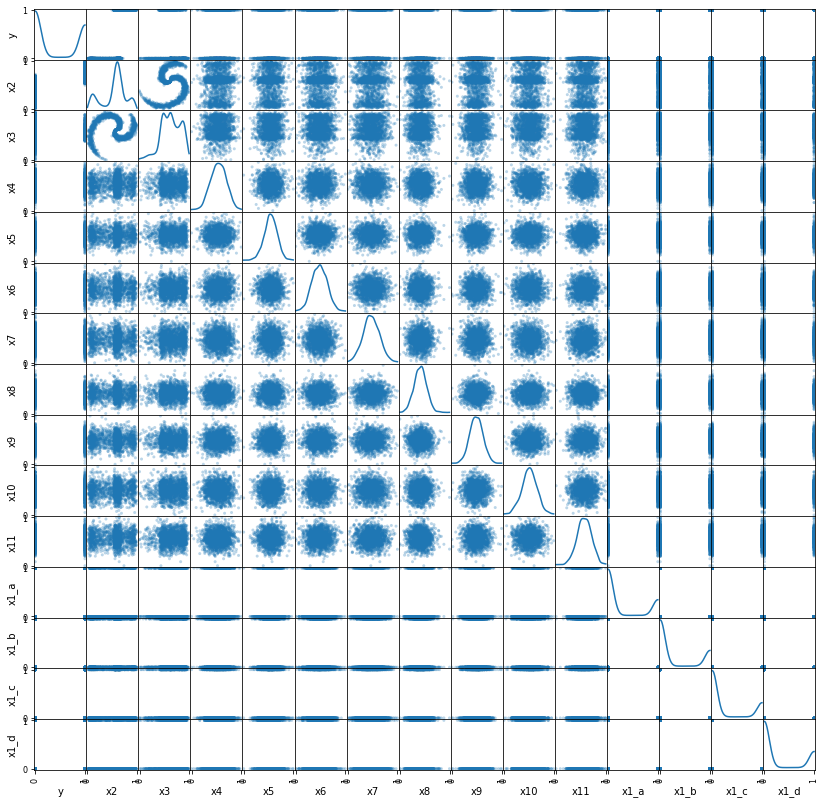

In [14]:
pd.plotting.scatter_matrix(normalizedDf, alpha=0.3, diagonal='kde', figsize=(14,14))

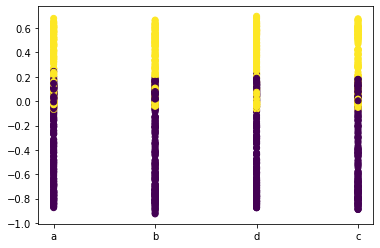

In [15]:
plt.scatter(df['x1'], df['x2'], c=labels)

In [ ]:
# tried pca, but not required hence continueing without pca
# from sklearn.decomposition import PCA
# pca = PCA()
# transformedData = pd.DataFrame(pca.fit_transform(features))

In [ ]:
# transformedData.head()

In [ ]:
# transformedData['y'] = labels

In [ ]:
# transformedData.head()

In [ ]:
# transformedData.corr().loc['y', :]

In [ ]:
# pd.plotting.scatter_matrix(transformedData, alpha=0.3, diagonal='kde', figsize=(20,20))

In [16]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1360 samples.
Testing set has 340 samples.


In [17]:
from sklearn.model_selection import learning_curve
def evaluate_model(model, xTrain, yTrain):
    train_sizes, train_scores, test_scores = learning_curve(model(), 
                                                            xTrain, 
                                                            yTrain,
                                                            # Number of folds in cross-validation
                                                            cv=14,
                                                            # Evaluation metric
                                                            scoring='accuracy',
                                                            # Use all computer cores
                                                            n_jobs=-1, 
                                                            # 50 different sizes of the training set
                                                            train_sizes=np.linspace(0.01, 1.0, 50))
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()


In [77]:
def train_predict_score_model(clf, xTrain, yTrain, xTest, yTest):
    start = time()
    # if random_state is not None:
    #     clf = model(random_state=0)
    
    # else:
    #     clf = model()

    clf.fit(xTrain, yTrain)
    print("\n\ntrain time : {}".format(str(time() - start)))

    # Performance on train data
    print('\nPerformance on train data')
    trainPreds = clf.predict(xTrain)
    predAcc = accuracy_score(yTrain, trainPreds)
    print('Training predictions accuracy : {}'.format(str(predAcc)))
    print('Confusion Matrix trian predictions')
    print(confusion_matrix(yTrain, trainPreds))
    fscoreTrain = fbeta_score(yTrain, trainPreds, beta=0.5)
    print('Training predictions f score : {}'.format(str(fscoreTrain)))

    # Performance on test data
    print('\nPerformance on test data')
    testPreds = clf.predict(xTest)
    predAcc = accuracy_score(yTest, testPreds)
    print('Testing predictions accuracy : {}'.format(str(predAcc)))
    print('Confusion Matrix test predictions')
    print(confusion_matrix(yTest, testPreds))
    fscoreTest = fbeta_score(yTest, testPreds, beta=0.5)
    print('Testing predictions f score : {}'.format(str(fscoreTest)))
    return clf

In [29]:
# import the models under consideration
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Evaluating on all the features

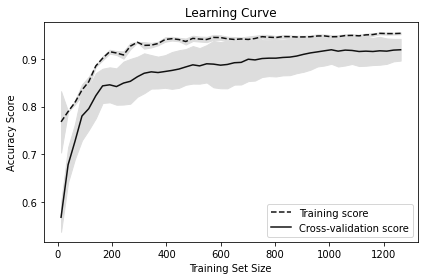

In [30]:
evaluate_model(KNeighborsClassifier, X_train, y_train)

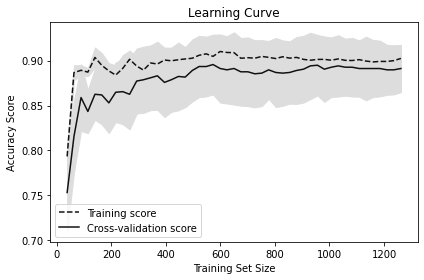

In [20]:
evaluate_model(LogisticRegression, X_train, y_train)

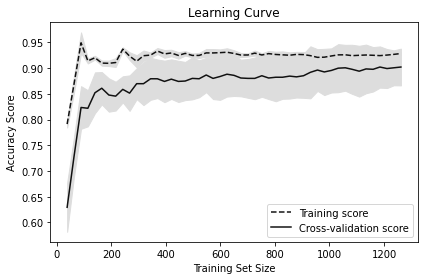

In [21]:
evaluate_model(SVC, X_train, y_train)

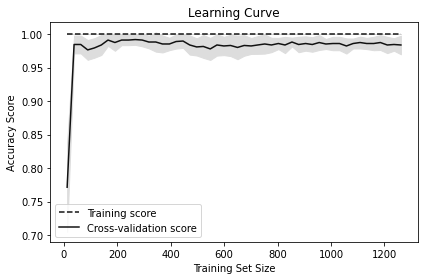

In [22]:
evaluate_model(DecisionTreeClassifier, X_train, y_train)

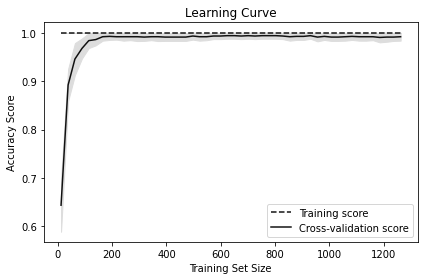

In [23]:
evaluate_model(RandomForestClassifier, X_train, y_train)

In [78]:
clf = train_predict_score_model(KNeighborsClassifier(), X_train, y_train, X_test, y_test)



train time : 0.008440494537353516

Performance on train data
Training predictions accuracy : 0.9551470588235295
Confusion Matrix trian predictions
[[770  26]
 [ 35 529]]
Training predictions f score : 0.9500718390804598

Performance on test data
Testing predictions accuracy : 0.9176470588235294
Confusion Matrix test predictions
[[187  17]
 [ 11 125]]
Testing predictions f score : 0.8877840909090909


In [79]:
clf = train_predict_score_model(LogisticRegression(random_state=0), X_train, y_train, X_test, y_test)



train time : 0.03538680076599121

Performance on train data
Training predictions accuracy : 0.9029411764705882
Confusion Matrix trian predictions
[[758  38]
 [ 94 470]]
Training predictions f score : 0.9052388289676426

Performance on test data
Testing predictions accuracy : 0.8735294117647059
Confusion Matrix test predictions
[[189  15]
 [ 28 108]]
Testing predictions f score : 0.8598726114649681


In [80]:
clf = train_predict_score_model(SVC(random_state=0), X_train, y_train, X_test, y_test)



train time : 0.05241990089416504

Performance on train data
Training predictions accuracy : 0.9323529411764706
Confusion Matrix trian predictions
[[753  43]
 [ 49 515]]
Training predictions f score : 0.920958512160229

Performance on test data
Testing predictions accuracy : 0.8676470588235294
Confusion Matrix test predictions
[[186  18]
 [ 27 109]]
Testing predictions f score : 0.8462732919254659


In [81]:
clf = train_predict_score_model(DecisionTreeClassifier(random_state=0), X_train, y_train, X_test, y_test)



train time : 0.009652853012084961

Performance on train data
Training predictions accuracy : 1.0
Confusion Matrix trian predictions
[[796   0]
 [  0 564]]
Training predictions f score : 1.0

Performance on test data
Testing predictions accuracy : 0.9852941176470589
Confusion Matrix test predictions
[[199   5]
 [  0 136]]
Testing predictions f score : 0.9714285714285715


In [82]:
clf = train_predict_score_model(RandomForestClassifier(random_state=0), X_train, y_train, X_test, y_test)



train time : 0.33308911323547363

Performance on train data
Training predictions accuracy : 1.0
Confusion Matrix trian predictions
[[796   0]
 [  0 564]]
Training predictions f score : 1.0

Performance on test data
Testing predictions accuracy : 0.9911764705882353
Confusion Matrix test predictions
[[202   2]
 [  1 135]]
Testing predictions f score : 0.9868421052631579


### Evaluating with feature selection

In [83]:
selectedFeatures = features[['x1_a', 'x1_b', 'x1_c', 'x1_d', 'x2', 'x3']]
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(selectedFeatures, labels, test_size = 0.2, random_state = 0)
clf = train_predict_score_model(RandomForestClassifier(random_state=0), X_train_filtered, y_train_filtered, X_test_filtered, y_test_filtered)



train time : 0.21679306030273438

Performance on train data
Training predictions accuracy : 1.0
Confusion Matrix trian predictions
[[796   0]
 [  0 564]]
Training predictions f score : 1.0

Performance on test data
Testing predictions accuracy : 0.9852941176470589
Confusion Matrix test predictions
[[200   4]
 [  1 135]]
Testing predictions f score : 0.9754335260115606


In [84]:
selectedFeatures = features[['x2', 'x3']]
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(selectedFeatures, labels, test_size = 0.2, random_state = 0)
clf = train_predict_score_model(RandomForestClassifier(random_state=0), X_train_filtered, y_train_filtered, X_test_filtered, y_test_filtered)



train time : 0.19141006469726562

Performance on train data
Training predictions accuracy : 0.9992647058823529
Confusion Matrix trian predictions
[[796   0]
 [  1 563]]
Training predictions f score : 0.9996448863636364

Performance on test data
Testing predictions accuracy : 0.9970588235294118
Confusion Matrix test predictions
[[203   1]
 [  0 136]]
Testing predictions f score : 0.9941520467836258


### Part 2

#### Addressing x2 > 0

In [85]:
newDf = oneHotEncodedDf.copy(deep=True)

In [86]:
# newDf['x2'] = newDf['x2'].apply(lambda x: 1 if x > 0 else 0)
newDf['x2'] = newDf['x2'].apply(lambda x: x if x > 0 else 0)
# newDf[normalizableColumns] = scaler.fit_transform(newDf[normalizableColumns])

In [87]:
newDf.describe()

,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x1_a,x1_b,x1_c,x1_d
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.411765,0.128621,0.025411,-0.004941,-0.018150,0.004139,-0.004442,0.039203,-0.024454,-0.008586,0.005379,0.253529,0.253529,0.234706,0.258235
std,0.492298,0.192757,0.284509,1.001383,0.983988,1.031957,1.033610,0.978798,0.987621,0.993979,1.017824,0.435159,0.435159,0.423940,0.437793
min,0.000000,0.000000,-0.931249,-3.547109,-4.166713,-3.271321,-3.050503,-3.188723,-3.691485,-3.426298,-4.075024,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-0.189961,-0.693761,-0.630827,-0.717443,-0.679205,-0.606272,-0.691628,-0.643558,-0.679580,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.018826,0.011861,0.002496,0.008173,0.015596,-0.021232,0.049557,-0.040668,0.012354,0.009655,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.156138,0.270204,0.697783,0.638092,0.748816,0.713769,0.673363,0.629988,0.654637,0.692432,1.000000,1.000000,0.000000,1.000000
max,1.000000,0.696405,0.567431,2.977407,3.434698,3.575212,3.387439,4.651006,3.763927,3.259833,3.095674,1.000000,1.000000,1.000000,1.000000


In [88]:
labels_1 = newDf['y']
features_1 = newDf.drop(['y'], axis=1)
selectedFeatures = features_1
# selectedFeatures = features_1[['x2', 'x3']]
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(selectedFeatures, labels_1, test_size = 0.2, random_state = 0)
clf = train_predict_score_model(RandomForestClassifier(random_state=0), X_train_filtered, y_train_filtered, X_test_filtered, y_test_filtered)



train time : 0.34142041206359863

Performance on train data
Training predictions accuracy : 1.0
Confusion Matrix trian predictions
[[796   0]
 [  0 564]]
Training predictions f score : 1.0

Performance on test data
Testing predictions accuracy : 0.9441176470588235
Confusion Matrix test predictions
[[193  11]
 [  8 128]]
Testing predictions f score : 0.9248554913294796


#### finding threshold for x4

In [91]:
# for x in range(2, 14):
#     dtclf = train_predict_score_model(RandomForestClassifier(random_state=0, max_depth=x), X_train_filtered, y_train_filtered, X_test_filtered, y_test_filtered)
#     print(x)

In [61]:
from sklearn import tree
from graphviz import Source
graph = Source(tree.export_graphviz(dtclf, out_file=None))
graph.format = 'png'
graph.render('dtree_render', view=True)

'dtree_render.png'

In [ ]:
X_train_filtered.describe()

,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x1_a,x1_b,x1_c,x1_d
count,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000
mean,0.131646,0.028320,-0.006796,-0.026003,-0.000702,0.006755,0.023669,-0.038682,-0.015264,-0.010854,0.261029,0.248529,0.231618,0.258824
std,0.195647,0.282041,0.995766,0.985438,1.022528,1.025131,0.992757,0.983712,0.989526,1.015109,0.439357,0.432319,0.422021,0.438150
min,0.000000,-0.931249,-3.547109,-4.166713,-3.215297,-2.890611,-3.188723,-3.691485,-3.426298,-4.075024,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.183381,-0.694102,-0.625536,-0.731292,-0.662689,-0.615637,-0.697119,-0.655700,-0.694835,0.000000,0.000000,0.000000,0.000000
50%,0.020042,0.015581,-0.001330,-0.019781,0.020800,-0.012677,0.038776,-0.055558,-0.000131,-0.003674,0.000000,0.000000,0.000000,0.000000
75%,0.159206,0.271235,0.698791,0.634200,0.717946,0.702495,0.654192,0.601012,0.635682,0.670513,1.000000,0.000000,0.000000,1.000000
max,0.696405,0.567431,2.977407,3.434698,3.331947,3.387439,4.651006,3.595073,2.983422,3.095674,1.000000,1.000000,1.000000,1.000000


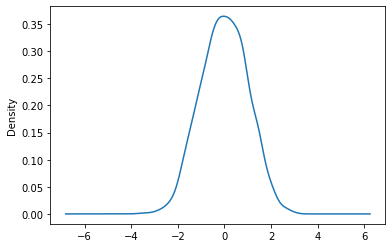

In [ ]:
newDf['x4'].plot.density()

In [ ]:
test_df = df[df['y']==0]

In [92]:
# test_df.describe()

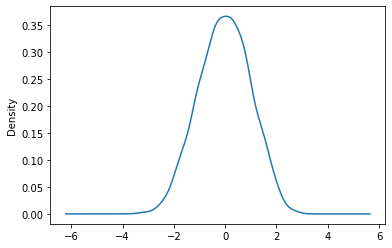

In [ ]:
test_df['x4'].plot.density()

In [ ]:
test_df = df[df['y']==1]

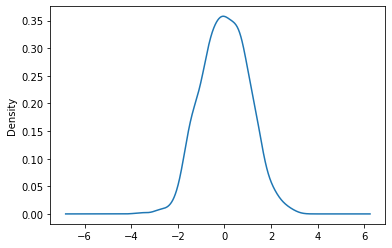

In [ ]:
test_df['x4'].plot.density()

In [ ]:
test_df.describe()

,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
count,700.0,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,1.0,0.253267,-0.105171,0.022613,-0.013472,-0.041523,-0.039662,-0.003783,-0.017161,0.053045,-0.021366
std,0.0,0.245808,0.166762,1.003959,0.960265,1.039883,1.051872,0.968208,0.991203,0.966072,1.037973
min,1.0,-0.125102,-0.364619,-3.547109,-2.877057,-3.215297,-2.890611,-2.526930,-3.551171,-3.081777,-4.075024
25%,1.0,-0.001936,-0.232580,-0.681116,-0.634963,-0.779067,-0.748621,-0.679641,-0.663159,-0.556723,-0.648572
50%,1.0,0.224363,-0.145603,0.012223,-0.025100,0.009903,-0.069043,-0.009420,-0.031886,0.053678,-0.003303
75%,1.0,0.501386,-0.024960,0.713304,0.627994,0.706462,0.667739,0.676349,0.647506,0.712794,0.670930
max,1.0,0.696405,0.474967,2.977407,3.196908,3.331947,2.819207,2.857309,2.909672,2.983422,3.095674


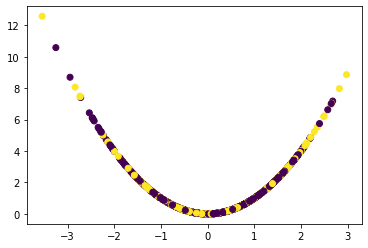

In [ ]:
# plt.scatter(df['x4'], df['x4'].apply(lambda x: x**2), c=labels)
plt.scatter(newDf['x4'].apply(lambda x: x), newDf['x4'].apply(lambda x: x**2), c=labels)

In [ ]:
newDf.describe()

,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x1_a,x1_b,x1_c,x1_d
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.411765,0.128621,0.025411,-0.004941,-0.018150,0.004139,-0.004442,0.039203,-0.024454,-0.008586,0.005379,0.253529,0.253529,0.234706,0.258235
std,0.492298,0.192757,0.284509,1.001383,0.983988,1.031957,1.033610,0.978798,0.987621,0.993979,1.017824,0.435159,0.435159,0.423940,0.437793
min,0.000000,0.000000,-0.931249,-3.547109,-4.166713,-3.271321,-3.050503,-3.188723,-3.691485,-3.426298,-4.075024,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-0.189961,-0.693761,-0.630827,-0.717443,-0.679205,-0.606272,-0.691628,-0.643558,-0.679580,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.018826,0.011861,0.002496,0.008173,0.015596,-0.021232,0.049557,-0.040668,0.012354,0.009655,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.156138,0.270204,0.697783,0.638092,0.748816,0.713769,0.673363,0.629988,0.654637,0.692432,1.000000,1.000000,0.000000,1.000000
max,1.000000,0.696405,0.567431,2.977407,3.434698,3.575212,3.387439,4.651006,3.763927,3.259833,3.095674,1.000000,1.000000,1.000000,1.000000
